question 1

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

total multipplication: n*m*k

total addition: n*m*(k-1)

for each element of the matrix we will multiply k column values of one matrix to corrosponding k rows of another matrix. for each element will multiply for k times and add for k-1 times, so for total n*m matrix, we will multipy for total n*m*k times and add for n*m*(k-1) times.


question 2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?



In [52]:
import numpy as np
import time
start_d=time.time()
a=[[1,2,3],[5,6,7]]
b=[[7,8,9,10],[11,12,13,14],[15,16,17,18]]
n=len(a) #no of rows for a
m=len(b[0]) #no of rows for b
k=len(a[0]) #no of columns for a
d=np.zeros((n,m))#making n*m matrix
for i in range(n):
  for j in range(m):
    s=0
    for x in range(k):
      s+=a[i][x]*b[x][j]
    d[i][j]=s
print(d)
end_d=time.time()
print('time taken using list: ',end_d-start_d)
start_c=time.time()
c=np.dot(a,b)
print(c)
end_c=time.time()
print('time taken using numpy: ',end_c-start_c)

[[ 74.  80.  86.  92.]
 [206. 224. 242. 260.]]
time taken using list:  0.005627155303955078
[[ 74  80  86  92]
 [206 224 242 260]]
time taken using numpy:  0.0012323856353759766


question 3

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

First method only uses loops which has more time complexity. To reduce that we can use quick sort.

 question 4

 What is the gradient of the following function with respect to x and y?

 (x^2)*y+(y^3)*sin(x)

ans:

derivative with respect to x :

2*x*y+y^3*cos(x)   

derivative with respect to y :

(x^2)+3*(y^2)*sin(x)
    

question 5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [81]:
def fun(x,y):
  return x*2*y+y*3*jnp.sin(x)

grf=jax.grad(fun,argnums=(0,1))
x= [10.0, 43.0, -1.0]
y= [55.0, 0.0, 5.0]

for i in range(len(x)):
  jax_grad = grf(x[i],y[i])
  deriv=(2*x[i]*y[i]+y[i]*3*jnp.cos(x[i]), x[i]*2+3*y[i]*2*jnp.sin(x[i]))
  print("Analytical - ",deriv)
  print("JAX -",jax_grad)

Analytical -  (Array(961.5532, dtype=float32, weak_type=True), Array(-159.52698, dtype=float32, weak_type=True))
JAX - (Array(-28.446793, dtype=float32, weak_type=True), Array(18.367937, dtype=float32, weak_type=True))
Analytical -  (Array(0., dtype=float32, weak_type=True), Array(86., dtype=float32, weak_type=True))
JAX - (Array(0., dtype=float32, weak_type=True), Array(83.50468, dtype=float32, weak_type=True))
Analytical -  (Array(-1.8954659, dtype=float32, weak_type=True), Array(-27.24413, dtype=float32, weak_type=True))
JAX - (Array(18.104534, dtype=float32, weak_type=True), Array(-4.524413, dtype=float32, weak_type=True))


In [86]:
import jax
import jax.numpy as jnp

def f(x,y):
 return x**2*y+y**3*jnp.sin(x)

gred=jax.grad(f,argnums=(0,1))

x_test= [1.0, 2.0, -1.5]
y_test= [0.5, -1.0, 1.5]
for i in x_test:
  for j in y_test:
    jax_grad = gred(i,j)
    derivetive= (2*i*j+j**3*jnp.cos(i), i**2+3*j**2*jnp.sin(i))
  print('analytical:' ,derivetive)
  print('Using jax:' ,jax_grad)

analytical: (Array(4.82352, dtype=float32, weak_type=True), Array(6.679929, dtype=float32, weak_type=True))
Using jax: (Array(4.82352, dtype=float32, weak_type=True), Array(6.679929, dtype=float32, weak_type=True))
analytical: (Array(4.5955043, dtype=float32, weak_type=True), Array(10.137757, dtype=float32, weak_type=True))
Using jax: (Array(4.5955043, dtype=float32, weak_type=True), Array(10.137757, dtype=float32, weak_type=True))
analytical: (Array(-4.261262, dtype=float32, weak_type=True), Array(-4.4830914, dtype=float32, weak_type=True))
Using jax: (Array(-4.261262, dtype=float32, weak_type=True), Array(-4.4830914, dtype=float32, weak_type=True))


question 6

Use sympy to confirm that you obtain the same gradient analytically.

In [55]:
import sympy as sp
x,y=sp.symbols('x y')
f=x**2*y+y**3*sp.sin(x)
ana_x=sp.diff(f,x)
ana_y=sp.diff(f,y)
print(ana_x,'\n',ana_y)

2*x*y + y**3*cos(x) 
 x**2 + 3*y**2*sin(x)


question 7

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:



In [ ]:
year=[2022,2023,2024,2025]
branch=['branch1','branch2']
subject=['maths','eng']
dic={}
for y in year:
  dic[y]={}
  for b in branch:
    dic[y][b]={}
    dic[y][b]["roll no."]=input('enter the roll no. '
                                )
    dic[y][b]["name"]=input('name of the student: ')
    dic[y][b]["marks"]={}
    for sub in subject:
      print('marks for ', sub, 'is :')
      x=int(input())
      dic[y][b]["marks"][sub]=x
print(dic)

enter the roll no.1
name of the student: niyati
marks for  maths is :
90
marks for  eng is :
89
enter the roll no.1
name of the student: tanvi
marks for  maths is :
89
marks for  eng is :
70
enter the roll no.2
name of the student: hridya
marks for  maths is :
67
marks for  eng is :
79
enter the roll no.2
name of the student: diya
marks for  maths is :
67
marks for  eng is :
99
enter the roll no.3
name of the student: thrisha
marks for  maths is :
34
marks for  eng is :
67
enter the roll no.3
name of the student: priya
marks for  maths is :
77
marks for  eng is :
99
enter the roll no.2
name of the student: kunj
marks for  maths is :
56
marks for  eng is :
67
enter the roll no.45
name of the student: parth
marks for  maths is :
90
marks for  eng is :
99
{2022: {'branch1': {'roll no.': '1', 'name': 'niyati', 'marks': {'maths': 90, 'eng': 89}}, 'branch2': {'roll no.': '1', 'name': 'tanvi', 'marks': {'maths': 89, 'eng': 70}}}, 2023: {'branch1': {'roll no.': '2', 'name': 'hridya', 'marks': 

que 8

In [ ]:
class STUDENT:
  def __init__(self,rollno,name,marks):
    self.name=name
    self.rollno=rollno
    self.marks=marks

class BRANCH:
  def __init__(self,name):
    self.name=name
    self.students=[]

  def add_student(self,student):
    self.students.append(student)

class YEAR:
  def __init__(self,year):
    self.year=year
    self.branches=[]

  def add_Branch(self,branch):
    self.branches.append(branch)

data=[]
stud1=STUDENT(1,'tanvi',{'marks':{'maths':90,'eng':99}})
stud2=STUDENT(1,'niyati',{'marks':{'maths':80,'eng':97}})
stud3=STUDENT(1,'diya',{'marks':{'maths':99,'eng':99}})
stud4=STUDENT(1,'hridya',{'marks':{'maths':60,'eng':67}})

branch1=BRANCH('branch1')
branch1.add_student(stud1)
year1=YEAR(2022)
year1.add_Branch(branch1)
data.append(year1)

branch2=BRANCH('branch1')
branch2.add_student(stud2)
year2=YEAR(2023)
year2.add_Branch(branch2)
data.append(year2)

branch3=BRANCH('branch1')
branch3.add_student(stud3)
year3=YEAR(2024)
year3.add_Branch(branch3)
data.append(year3)

branch4=BRANCH('branch1')
branch4.add_student(stud4)
year4=YEAR(2025)
year4.add_Branch(branch4)
data.append(year4)

print(data)

[<__main__.YEAR object at 0x7cc53b920430>, <__main__.YEAR object at 0x7cc53b920400>, <__main__.YEAR object at 0x7cc53b9204f0>, <__main__.YEAR object at 0x7cc53b9205b0>]


question 9

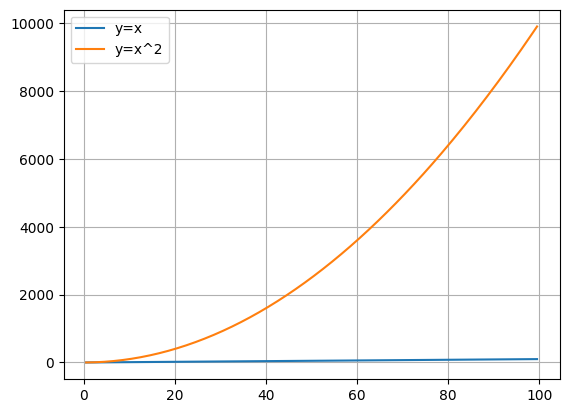

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0.5,100.0,0.5)
plt.plot(x,x,label='y=x')
plt.plot(x,np.power(x,2),label='y=x^2')
plt.grid()
plt.legend()
plt.show()

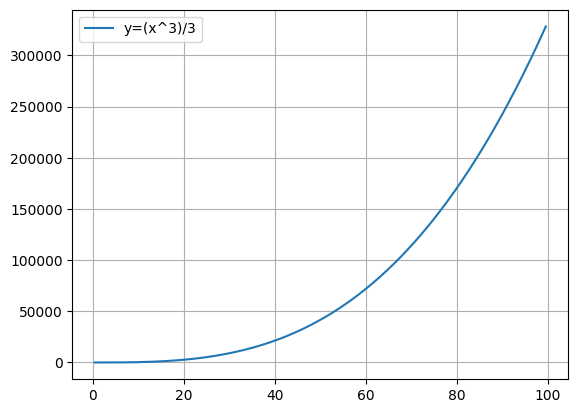

In [ ]:
plt.plot(x,(np.power(x,3))/3,label='y=(x^3)/3')
plt.grid()
plt.legend()
plt.show()

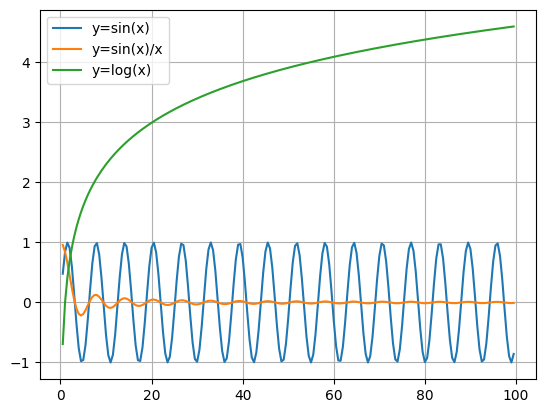

In [ ]:
plt.plot(x,np.sin(x),label='y=sin(x)')
plt.plot(x,(np.sin(x))/x,label='y=sin(x)/x')
plt.plot(x,np.log(x),label='y=log(x)')
plt.grid()
plt.legend()
plt.show()

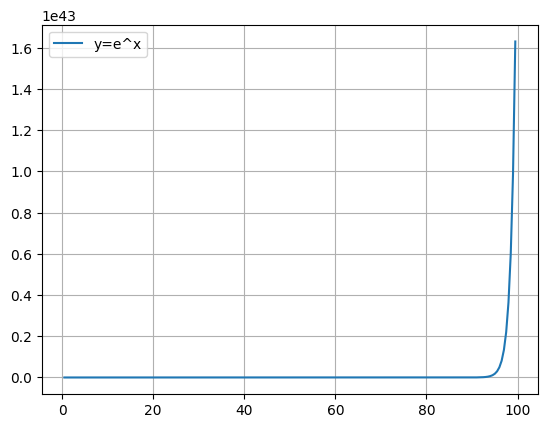

In [ ]:
plt.plot(x,np.exp(x),label='y=e^x')
plt.grid()
plt.legend()
plt.show()

question 10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import random
import numpy as np
import pandas as pd
x=np.random.uniform(1,2,size=(20,5))
y=pd.DataFrame(x,columns=['a','b','c','d','e'])
print(y)
w=y.std().idxmax()
z=y.mean(axis=1).idxmin()
print(w,z)

           a         b         c         d         e
0   1.784612  1.785729  1.171178  1.954640  1.141429
1   1.704219  1.147734  1.929248  1.538123  1.384093
2   1.909015  1.204897  1.499686  1.587629  1.858221
3   1.716113  1.090230  1.380836  1.676774  1.535751
4   1.531694  1.178247  1.349933  1.558841  1.954745
5   1.551410  1.385485  1.183259  1.488089  1.107303
6   1.382501  1.823961  1.685590  1.060589  1.957710
7   1.842494  1.707159  1.159650  1.497021  1.071223
8   1.806802  1.049949  1.332389  1.481998  1.630414
9   1.793710  1.802485  1.133233  1.363342  1.810377
10  1.504661  1.789182  1.095347  1.305889  1.756168
11  1.773687  1.739705  1.454713  1.812803  1.385083
12  1.719390  1.432051  1.936803  1.065682  1.123670
13  1.774571  1.924384  1.754994  1.069844  1.227939
14  1.218852  1.519677  1.788100  1.291798  1.385004
15  1.669112  1.739422  1.266696  1.102592  1.045725
16  1.871416  1.257655  1.755641  1.447297  1.501448
17  1.650546  1.336154  1.754652  1.004475  1.

In [ ]:
y['f']=y['a']+y['b']+y['c']+y['d']+y['e']
y['g']='LT8'
y.loc[y['f']>=8,'g']='GT8'
print(y)

           a         b         c         d         e         f    g
0   1.305863  1.118215  1.901230  1.488863  1.607920  7.422091  LT8
1   1.869056  1.061999  1.334026  1.308118  1.570651  7.143850  LT8
2   1.555104  1.453951  1.942382  1.542448  1.870965  8.364850  GT8
3   1.436685  1.421202  1.298953  1.478951  1.775190  7.410980  LT8
4   1.862710  1.544857  1.950943  1.404493  1.157926  7.920929  LT8
5   1.476068  1.085413  1.746278  1.915260  1.544887  7.767906  LT8
6   1.401196  1.456396  1.927593  1.531601  1.597956  7.914742  LT8
7   1.583484  1.580166  1.178951  1.188473  1.006965  6.538038  LT8
8   1.730147  1.999018  1.329448  1.138433  1.018467  7.215512  LT8
9   1.343112  1.723922  1.086214  1.254369  1.073281  6.480898  LT8
10  1.298391  1.759066  1.339659  1.288968  1.338591  7.024675  LT8
11  1.320333  1.757930  1.596580  1.757195  1.875751  8.307789  GT8
12  1.776584  1.957365  1.695948  1.678505  1.912730  9.021132  GT8
13  1.513947  1.314249  1.958095  1.427276  1.39

In [ ]:
y['z']=y.loc[y['g']=='LT8','f']
p=y['z'].std()
y['w']=y.loc[y['g']=='GT8','f']
q=y['w'].std()
print(p,'\n',q)

0.4520235510848639 
 0.37323883205845676


question 12 Write a small piece of code to explain broadcasting in numpy. Broadcasting tells us how numpy library treats arrays of different shapes during arithmetic operations. This process allows us to broadcast the small array into a larger one, which helps us do the arithmetic operation.

In [ ]:
arr1=np.array([1,2,3])
arr2=np.array([[4],[5],[6]])
print(arr1.shape,arr2.shape)
print(arr1+arr2)

(3,) (3, 1)
[[5 6 7]
 [6 7 8]
 [7 8 9]]


question 13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def f(a):
    a=a.flatten()
    mindex = 0
    mvalue = a[0]
    for i in range(1, a.size):
        if a[i] < mvalue:
            mindex=i
            mvalue=a[i]

    return mindex

arr=np.array([[9,3,6,7],[1,4,7,9]])
min_index=f(arr)
print(min_index)
x=np.argmin(arr)
print(x)

4
4
